# 计算移动社交网络密度

##   1.移动数据读取

In [2]:
%matplotlib  inline
import pandas as pd
import numpy as np
# call_record=pd.read_csv("data/call_record_hour.csv",index_col=0)
# # call_record=call_record[call_record.age_Gap<50]
# call_record.head(3)

In [49]:
call_record1=call_record.drop_duplicates(['custorm_id','number'])

In [20]:
cust_info=pd.read_csv('data/fdl_cust_user_info_chain.csv',index_col=0).set_index('mobi_no')

In [12]:
call_record.shape

(1589331, 62)

In [4]:
cust_info.shape

(4810000, 4)

In [7]:
cust_info.head(3)

,custorm_id,cust_name,id_no,reg_src
mobi_no,,,,
13912583150,16568,张方圆,320922199410083316,Android
18657111700,23318,许立,330183198505063111,Android
18606606550,32378,潘柳清,33252619901202211X,iOS


In [55]:
cust_info.index=cust_info.index.astype('int')

In [56]:
mobi_id=cust_info.custorm_id.to_dict()

In [59]:
call_record1['number']=[mobi_id.get(line) for line in call_record1.number.values]

/opt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## 2.建立网络

In [78]:
call_net=call_record1.ix[:,['custorm_id','number']].dropna()
call_net.number=call_net.number.astype('int')

In [83]:
call_net=call_net.drop_duplicates()
call_net.shape

(2754953, 2)

In [84]:
call_net=call_net[call_net.custorm_id!=call_net.number]

In [85]:
call_net.shape

(2590450, 2)

### 2.1  数据准备

In [3]:
call_net=pd.read_csv('MSN/call_net.csv',index_col=0)
call_net=call_net[call_net.custorm_id!=call_net.number]
nodes=np.union1d(call_net.custorm_id.values,call_net.number.values)
nodes=[int(line)  for line in nodes]

In [4]:
call_net.head(3)

,custorm_id,number
1,3157627,2146658
5,3145029,3440971
6,3635979,3087894


### 2.2  初始化

In [5]:
from snap import *
# create a graph PNGraph
G3 = TNGraph.New()
G2=TUNGraph.New()

- 建立nodes,edges集合

In [5]:
nodes=np.union1d(call_net.custorm_id.values,call_net.number.values)
nodes=[int(line)  for line in nodes]

In [6]:
len(set(list(nodes)))

1624525

In [7]:
call_net=call_net[call_net.custorm_id!=call_net.number]

In [8]:
call_net.shape

(2590450, 2)

In [7]:
edges=call_net.values

### 2.3  添加节点、边并保存

In [8]:
# 添加节点
# G=TUNGraph.New()
for node in nodes:
    G2.AddNode(node) 
## 添加边
for A,B in edges:
    G2.AddEdge(A,B)

In [24]:
## 添加节点
for node in nodes:
    G3.AddNode(node) 
## 添加边
for A,B in edges:
    G3.AddEdge(A,B)
    
## 保存
# SaveGViz(G3,'call_net.graph','call_net')

In [ ]:
def getGNCommDetect(UGraph):
    CmtyV = TCnComV()
    modularity = CommunityGirvanNewman(UGraph, CmtyV)
    comm=pd.DataFrame([list(line) for line in list(CmtyV)])
    return comm,modularity

# print "The modularity of the network is %f" % modularity
x=getGNCommDetect(G2)

###  2.4 统计分析

- 出入度

In [11]:
nodes_stats=[]
DelDegKNodes(G2, 1, 0)
DelDegKNodes(G2, 0, 1)

for NI in G2.Nodes():
    temp=[NI.GetId(), NI.GetOutDeg(), NI.GetInDeg()]
    nodes_stats.append(temp)
call_net_nodes=pd.DataFrame(data=nodes_stats,columns=['id','OutDeg','InDeg']).set_index('id')

In [ ]:
CmtyV = TCnComV()
modularity = CommunityCNM(G2, CmtyV)
comm=pd.DataFrame([list(line) for line in list(CmtyV)])
print "The modularity of the network is %f" % modularity

In [13]:
SavePajek(G2, "comm_detect/Pajek_Graph1.out")

In [40]:
call_net_nodes=pd.DataFrame(data=nodes_stats,columns=['id','OutDeg','InDeg']).set_index('id')

In [44]:
call_net_nodes.describe()

,OutDeg,InDeg
count,1.624525e+06,1.624525e+06
mean,1.594589e+00,1.594589e+00
std,4.762374e+00,2.288669e+00
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.000000e+00
50%,0.000000e+00,1.000000e+00
75%,1.000000e+00,2.000000e+00
max,4.370000e+02,7.660000e+02


In [61]:
import matplotlib.pyplot as plt  
import matplotlib as mpl  
mpl.rc('figure', figsize=(10, 8))
font = {'family' : 'monospace',
          'weight' : 'bold',
          'size'   : 10}
mpl.rc("font",**font)
mpl.rc('lines', lw=2, c='r')

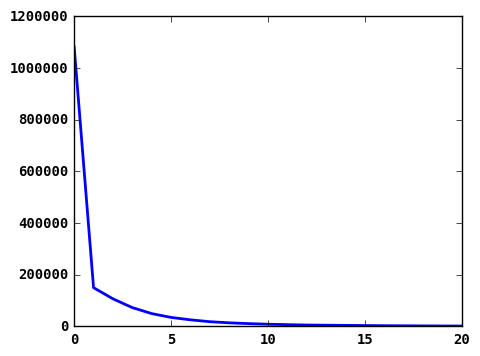

In [67]:
call_net_nodes.OutDeg.value_counts().plot(xlim=[0,20],figsize=(5,4))

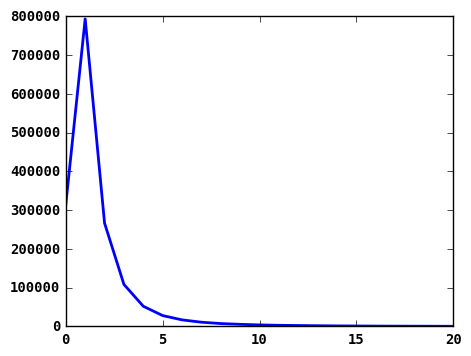

In [71]:
call_net_nodes.InDeg.value_counts().sort_index().plot(xlim=[0,20],figsize=(5,4))

In [75]:
CntV = TIntPrV()
GetWccSzCnt(G3, CntV)

In [76]:
for p in CntV:
    print p.GetVal1(),p.GetVal2()

2 46048
3 14957
4 5492
5 2334
6 1045
7 546
8 301
9 189
10 91
11 65
12 33
13 22
14 26
15 7
16 4
17 6
18 2
19 2
20 2
22 1
23 1
30 1
1436588 1


#### 2.4.1  强连通分量

- 返回强连通分量

In [64]:
DelDegKNodes(G, 1, 0)
DelDegKNodes(G, 0, 1)
Components = TCnComV()
GetSccs(G, Components)
strong_connect_size=pd.Series([CnCom.Len() for CnCom in Components])
    

In [65]:
strong_connect_size.value_counts()

3         1106
1          848
4          333
2          185
5          125
6           47
7           16
8            8
9            6
11           2
10           2
724991       1
dtype: int64

In [66]:
gg=GetMxScc(G)

In [114]:
SaveEdgeList(subg,'gg.csv')

In [115]:
ggs=pd.read_csv('gg.csv').ix[2:,:].values.flatten()

In [116]:
pd.DataFrame([line.split('\t')  for line in ggs],columns=['Src','Dis']).to_csv('ggs.csv')

- 返回强连通分量的分布

In [20]:
ComponentDist = TIntPrV()
GetSccSzCnt(G3, ComponentDist)

In [110]:
a=[]
for line in Components:
    if line.Len()>8 and line.Len()<12:
        a.extend(list(line.NIdV))

In [112]:
NIdV = TIntV()
for i in a:
    NIdV.Add(i)
subg=GetSubGraph(G,NIdV)

In [113]:
SaveEdgeList

96

- 双连通分量

In [54]:
Bi=GetMxBiCon(G3)

- 最大连通分量

In [55]:
Mxscc=GetMxScc(G3) 

In [60]:
nodes_scc=[line.GetId() for line in Mxscc.Nodes()]

In [63]:
len(nodes_scc)

43309

- 最大强连通分量中节点的分数

In [64]:
fraction=GetMxSccSz(G3)

In [65]:
fraction

0.026659485080254227

In [66]:
CnComs =TCnComV()
Get1CnCom(G3, CnComs)

TypeError: in method 'Get1CnCom', argument 1 of type 'PUNGraph const &'

In [68]:
dia=GetBfsFullDiam(G3, 100, False)

In [47]:
scc_distribution=pd.DataFrame([[p.GetVal1(),p.GetVal2()] for p in ComponentDist])

In [77]:
GetClustCf(G3)  ## 聚集系数

0.0620297954092897

In [78]:
GetTriads(G3)

359576

In [ ]:
# PlotClustCf(G3, "example", "Directed graph - clustering coefficient")
PlotShortPathDistr(G3, "example", "Directed graph - shortest path")


In [53]:
CmtyV = TCnComV()
modularity = CommunityCNM(G3, CmtyV)

cmm=[]
for Cmty in CmtyV:
    cmm.append([NI for NI in Cmty])

        

print "The modularity of the network is %f" % modularity

TypeError: in method 'CommunityCNM', argument 1 of type 'PUNGraph const &'

In [71]:
a='cab625df63a080af34b6aa2fa4756fae'
len(a)

32